In [7]:
import pandas as pd
import pandas_datareader as web
import datetime

In [8]:
start = datetime.datetime(2019,11,28)
end = datetime.date.today()
apple = web.DataReader("AAPL", "yahoo", start, end)
type(apple)

pandas.core.frame.DataFrame

In [9]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-27,66.995003,66.327499,66.394997,66.959999,65235600.0,65.847565
2019-11-29,67.000000,66.474998,66.650002,66.812500,46617600.0,65.702515
2019-12-02,67.062500,65.862503,66.817497,66.040001,94487200.0,64.942841
2019-12-03,64.882500,64.072502,64.577499,64.862503,114430400.0,63.784916
2019-12-04,65.827499,65.169998,65.267502,65.434998,67181600.0,64.347893


In [10]:
microsoft = web.DataReader("MSFT", "yahoo", start, end)
google = web.DataReader("GOOG", "yahoo", start, end)

In [11]:
tesla = web.DataReader("TSLA", "yahoo", start, end)
ibm = web.DataReader("IBM", "yahoo", start, end)

In [12]:
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"],
                      "TSLA" : tesla["Adj Close"],
                      "IBM" : ibm["Adj Close"]})
 
stocks.head()

,AAPL,MSFT,GOOG,TSLA,IBM
Date,,,,,
2019-11-27,65.847565,150.723297,1312.989990,66.258003,127.104172
2019-11-29,65.702515,149.793152,1304.959961,65.987999,127.750282
2019-12-02,64.942841,147.982330,1289.920044,66.973999,126.287033
2019-12-03,63.784916,147.744843,1295.280029,67.239998,125.536385
2019-12-04,64.347893,148.279175,1320.540039,66.606003,125.412872


In [13]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,MSFT,GOOG,TSLA,IBM
Date,,,,,
2019-11-27,1.000000,1.000000,1.000000,1.000000,1.000000
2019-11-29,0.997797,0.993829,0.993884,0.995925,1.005083
2019-12-02,0.986260,0.981815,0.982429,1.010806,0.993571
2019-12-03,0.968675,0.980239,0.986512,1.014821,0.987665
2019-12-04,0.977225,0.983784,1.005750,1.005252,0.986694


In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


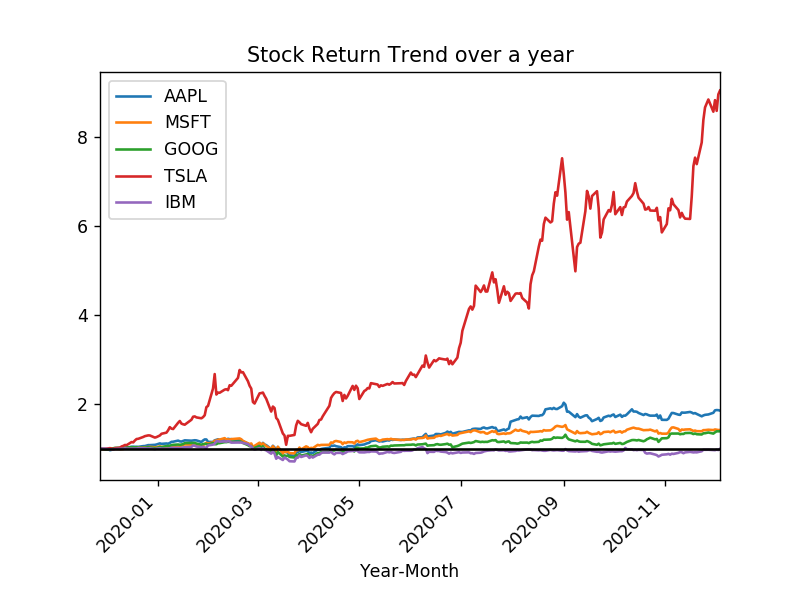

In [15]:
plt.figure()
for i, col in enumerate(stock_return.columns):
    stock_return[col].plot()
    
plt.title('Stock Return Trend over a year')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.legend(stock_return.columns)
plt.axhline(y=1, color='black', linestyle='-')

In [12]:
stock_return['TSLA']

Date
2019-11-27    1.000000
2019-11-29    0.995925
2019-12-02    1.010806
2019-12-03    1.014821
2019-12-04    1.005252
                ...   
2020-11-30    8.566512
2020-12-01    8.825500
2020-12-02    8.584925
2020-12-03    8.955597
2020-12-04    9.041021
Name: TSLA, Length: 258, dtype: float64

In [16]:
stock_return1 = stock_return.drop('TSLA', axis=1)

In [17]:
stock_return1

,AAPL,MSFT,GOOG,IBM
Date,,,,
2019-11-27,1.000000,1.000000,1.000000,1.000000
2019-11-29,0.997797,0.993829,0.993884,1.005083
2019-12-02,0.986260,0.981815,0.982429,0.993571
2019-12-03,0.968675,0.980239,0.986512,0.987665
2019-12-04,0.977225,0.983784,1.005750,0.986694
...,...,...,...,...
2020-11-30,1.807964,1.420285,1.341016,0.971801
2020-12-01,1.863698,1.434483,1.369470,0.968969
2020-12-02,1.869166,1.428910,1.392204,0.980456


<IPython.core.display.Javascript object>


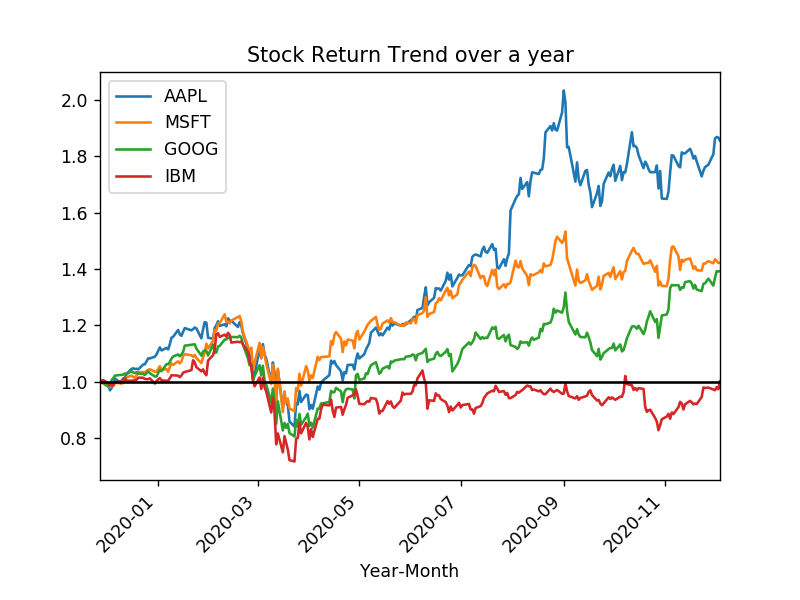

In [18]:
plt.figure()
for i, col in enumerate(stock_return1.columns):
    stock_return1[col].plot()
    
plt.title('Stock Return Trend over a year')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.legend(stock_return1.columns)
plt.axhline(y=1, color='black', linestyle='-')

In [14]:
stocks.tail()

,AAPL,MSFT,GOOG,TSLA,IBM
Date,,,,,
2020-11-30,119.050003,214.070007,1760.739990,567.599976,123.519997
2020-12-01,122.720001,216.210007,1798.099976,584.760010,123.160004
2020-12-02,123.080002,215.369995,1827.949951,568.820007,124.620003
2020-12-03,122.940002,214.240005,1826.770020,593.380005,123.610001
2020-12-04,121.709999,214.215805,1820.527954,592.718811,125.080002


<IPython.core.display.Javascript object>


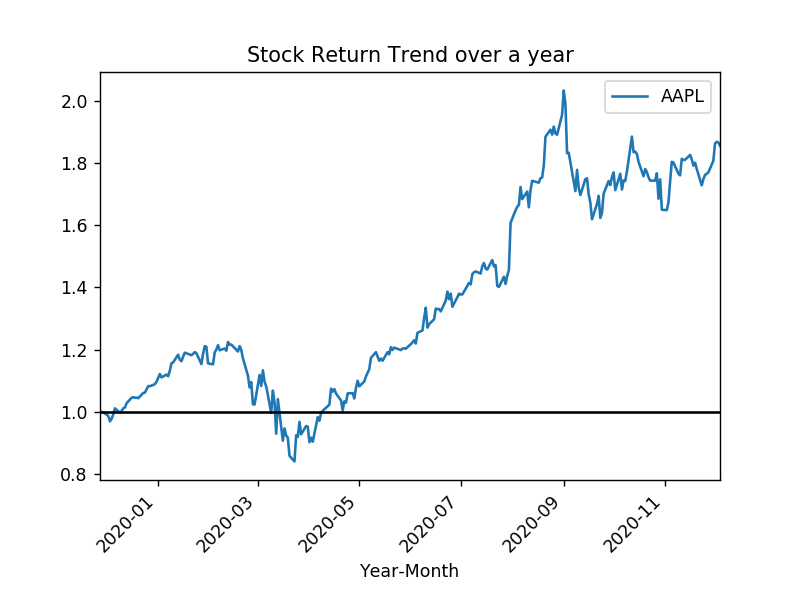

In [21]:
aapl = pd.DataFrame({"AAPL" : stock_return["AAPL"]})

plt.figure()

for i,col in enumerate(aapl.columns):
    aapl[col].plot()
    
plt.title('Stock Return Trend over a year')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.legend(aapl.columns)
plt.axhline(y=1, color='black', linestyle='-')

<IPython.core.display.Javascript object>


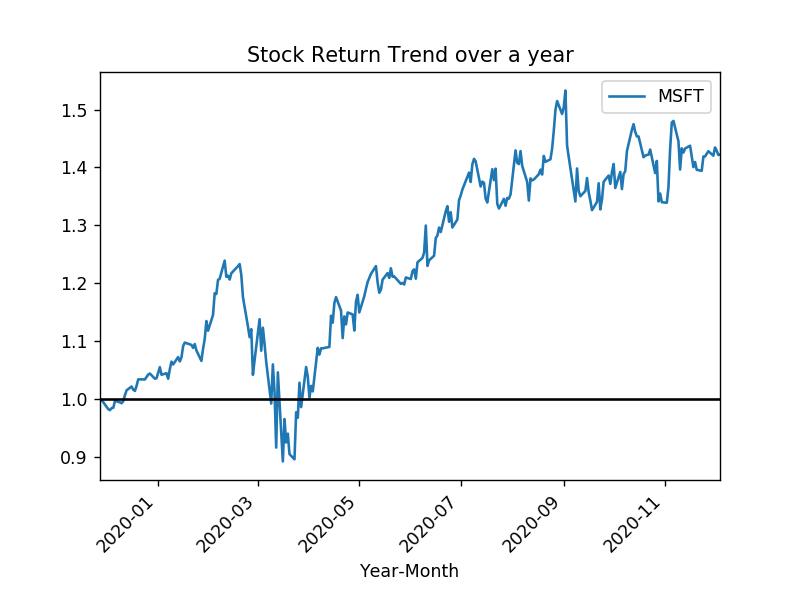

In [23]:
msft = pd.DataFrame({"MSFT" : stock_return["MSFT"]})

plt.figure()

for i,col in enumerate(msft.columns):
    msft[col].plot()
    
plt.title('Stock Return Trend over a year')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.legend(msft.columns)
plt.axhline(y=1, color='black', linestyle='-')

<IPython.core.display.Javascript object>


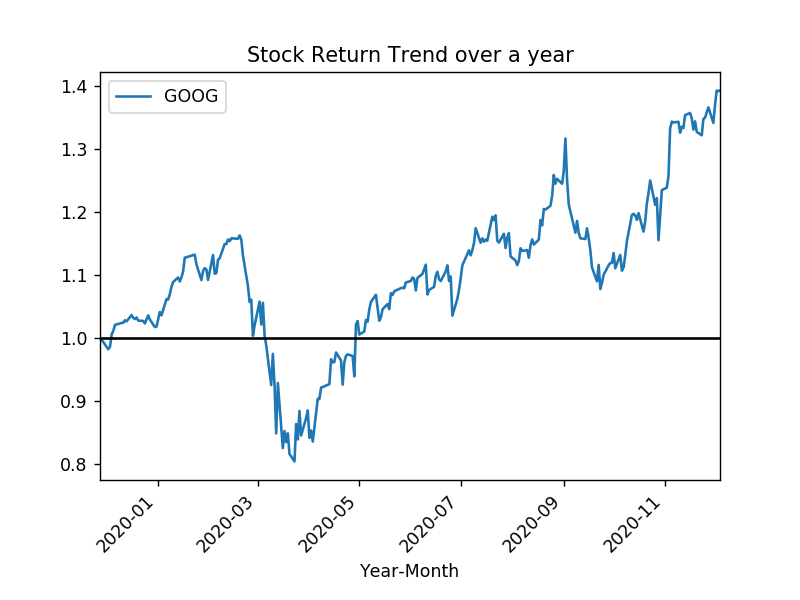

In [25]:
goog = pd.DataFrame({"GOOG" : stock_return["GOOG"]})

plt.figure()

for i,col in enumerate(goog.columns):
    goog[col].plot()
    
plt.title('Stock Return Trend over a year')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.legend(goog.columns)
plt.axhline(y=1, color='black', linestyle='-')

<IPython.core.display.Javascript object>


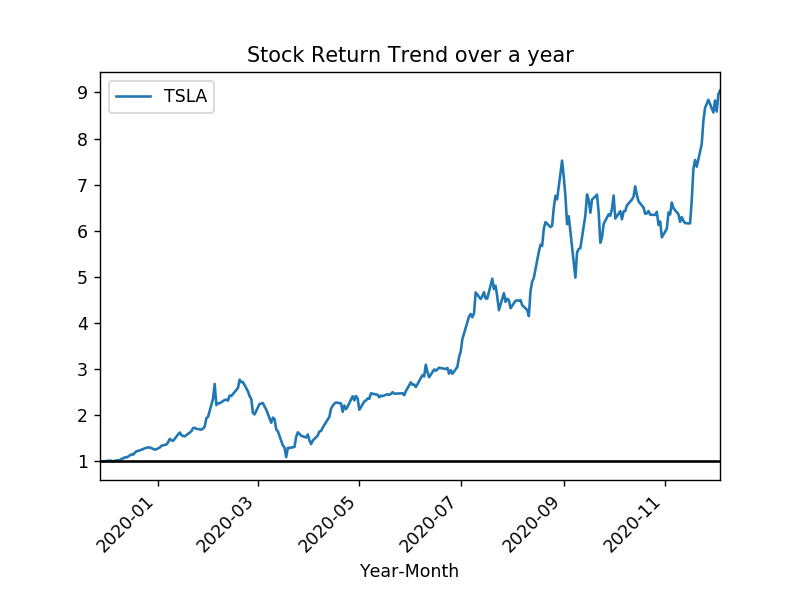

In [30]:
tsla = pd.DataFrame({"TSLA" : stock_return["TSLA"]})

plt.figure()

for i,col in enumerate(tsla.columns):
    tsla[col].plot()
    
plt.title('Stock Return Trend over a year')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.legend(tsla.columns)
plt.axhline(y=1, color='black', linestyle='-')

<IPython.core.display.Javascript object>


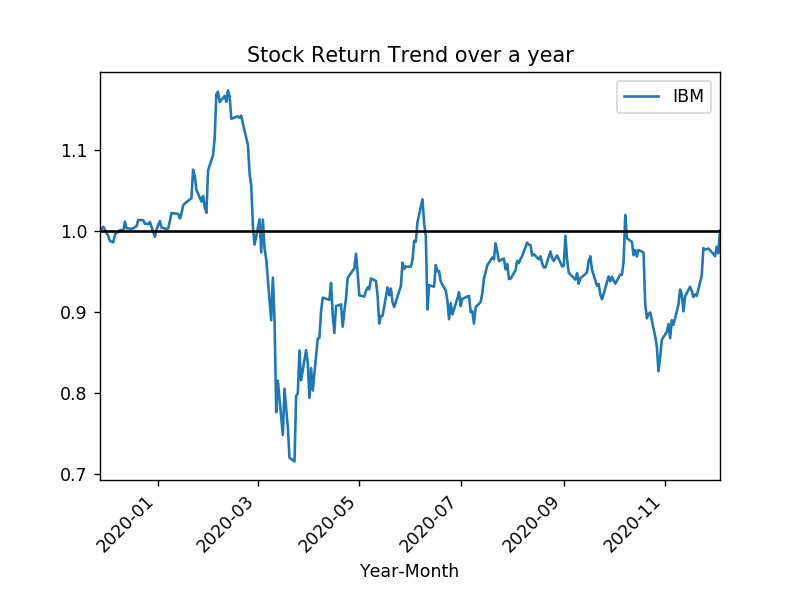

In [31]:
ib = pd.DataFrame({"IBM" : stock_return["IBM"]})

plt.figure()

for i,col in enumerate(ib.columns):
    ib[col].plot()  
    
plt.title('Stock Return Trend over a year')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.legend(ib.columns)
plt.axhline(y=1, color='black', linestyle='-')